- MSSV: 19127177
- Họ tên: Nguyễn Đăng Khoa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_excel('FlightDelays.xlsx')

# Câu 1

In [3]:
df.describe()

,Departure Time,Distance,FL_NUM,Weather,Day of Week
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1369.298955,211.871422,3815.086324,0.014539,3.905498
std,442.462754,13.316815,2409.750224,0.119725,1.903149
min,10.000000,169.000000,746.000000,0.000000,1.000000
25%,1004.000000,213.000000,2156.000000,0.000000,2.000000
50%,1450.000000,214.000000,2385.000000,0.000000,4.000000
75%,1709.000000,214.000000,6155.000000,0.000000,5.000000
max,2330.000000,229.000000,7924.000000,1.000000,7.000000


## Distance
Vẽ phân phối các chuyến bay theo khoảng cách của chúng

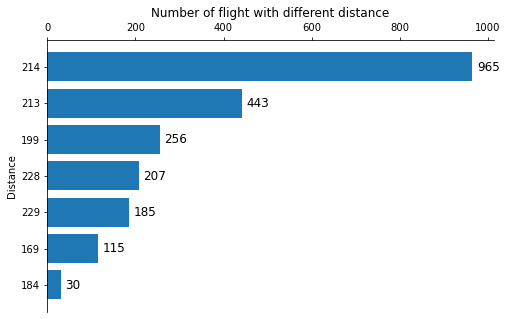

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
t = df['Distance'].astype('str').value_counts().sort_values(ascending=True)
bars = ax.barh(y=t.index, width=t.values)
ax.spines[['right', 'bottom']].set_visible(False)
ax.set_title('Number of flight with different distance', fontsize=12)
ax.xaxis.tick_top()
ax.set_ylabel('Distance')
for bar in bars:
    y = bar.get_y() + bar.get_height()/2
    x = bar.get_width()
    ax.text(x + 10, y, s=f'{x}', ha='left', va = 'center', fontsize=12)


Comment:
- Số các chuyến bay di chuyển với khoảng cách 214 chiếm phần lớn trong số các chuyến bay và nó cao hơn gấp đôi so với vị trí thứ 2 là số chuyến bay có khoảng cách là 213

## Carrier
Vẽ phân phối số các chuyến bay theo các Carrier

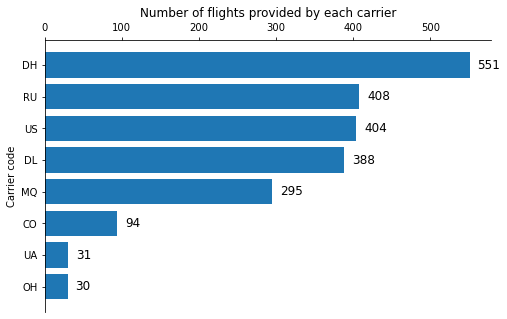

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
t = df['CARRIER'].value_counts().sort_values(ascending=True)
bars = ax.barh(y=t.index, width=t.values)
ax.spines[['right', 'bottom']].set_visible(False)
ax.set_title('Number of flights provided by each carrier', fontsize=12)
ax.xaxis.tick_top()
ax.set_ylabel('Carrier code')
for bar in bars:
    y = bar.get_y() + bar.get_height()/2
    x = bar.get_width()
    ax.text(x + 10, y, s=f'{x}', ha='left', va = 'center', fontsize=12)

Comment:
- Đường bay có mã DH đứng nhất trong số các đường bay
- RU và US có số chuyến bay tương đương nhau

## Departure time
Xem phân phối của số chuyến bay theo thời gian cất cánh của chúng 

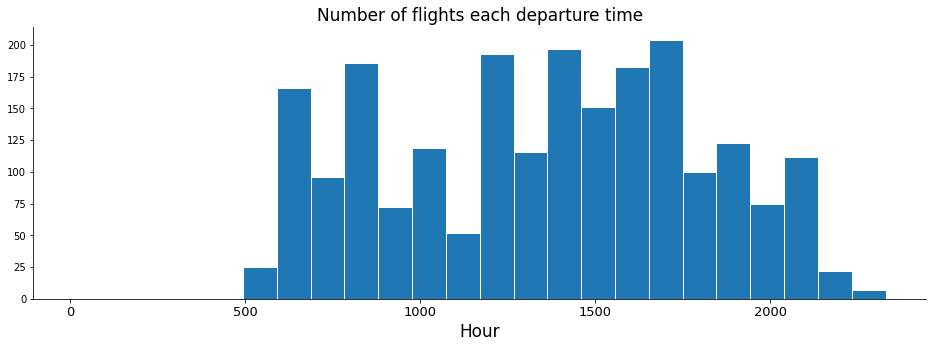

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16,5))
ax.spines[['right', 'top']].set_visible(False)
ax.hist(df['Departure Time'], bins=24, edgecolor='white')
ax.set_title('Number of flights each departure time', fontsize=17);
ax.set_xlabel('Hour', fontsize=17)
ax.tick_params('x', labelsize=13);

Comment:
- Các chuyến bay diễn ra vào buổi chiều nhiều hơn so với các thời gian khác trong ngày
- Thời điểm từ 0:00 đến 6:00 hầu như không có chuyến bay nào cả

## Date of Week

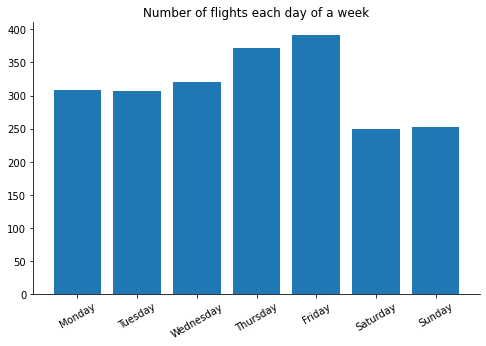

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
t = df['Day of Week'].value_counts().sort_index()
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.bar(day, t)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params('x', rotation=30, labelsize=10)
ax.set_title('Number of flights each day of a week', fontsize=12);

Comment:
- Thứ 5 và thứ 6 có nhiều số chuyến bay nhất
- Số chuyến bay vào thứ 7 và chủ nhật ít nhất và ít hơn các ngày trong tuần

## Route (Origin - Destination)
Xem xét số chuyến bay dựa vào đường bay của chúng

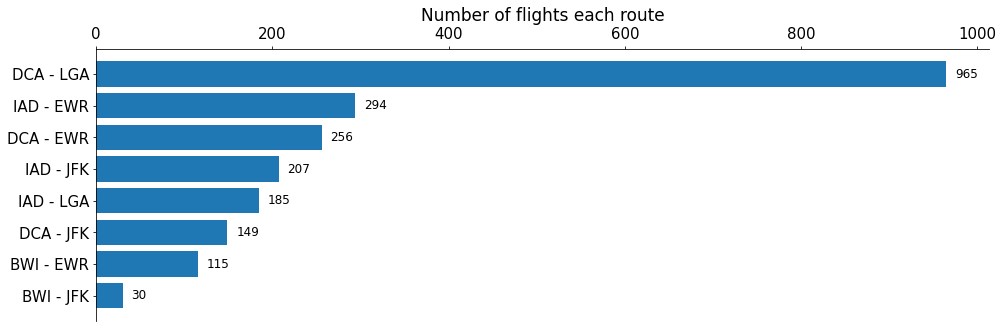

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
df['route'] = df[['Origin', 'Destination']].agg(' - '.join, axis=1)
t = df['route'].value_counts().sort_values(ascending=True)
bars = ax.barh(t.index, t.values)
ax.spines[['right', 'bottom']].set_visible(False)
ax.set_title('Number of flights each route', fontsize=17)
ax.tick_params('both', labelsize=15)
ax.xaxis.tick_top()
for bar in bars:
    y = bar.get_y() + bar.get_height()/2
    x = bar.get_width()
    ax.text(x + 10, y, s=f'{x}', ha='left', va = 'center', fontsize=12)

Comment:
- Số các chuyến bay đi từ DCA đến LGA chiếm nhiều nhất với 965 chuyến
- Ngược lại chỉ có 30 chuyến bay từ BWI đến JFK

## Flight status

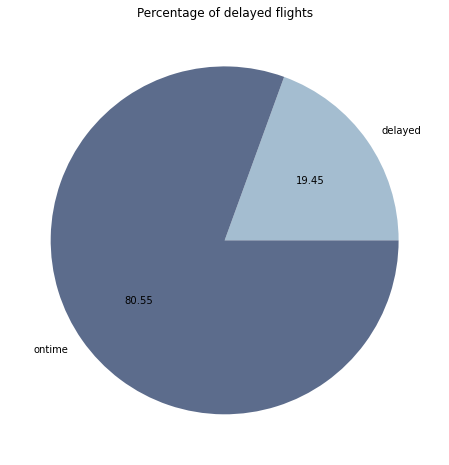

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
t = df['Flight Status'].value_counts().sort_values()
ax.pie(x=t, labels=t.index, colors=['#a4bdd0', '#5c6c8c'], autopct='%.2f')
ax.set_title('Percentage of delayed flights');

Comment:
- Dữ liệu có phần lệch sang phần các chuyến bay đúng giờ
- Có tới 80.55% số chuyến bay đúng giờ
- Chỉ có khoảng 19.45% số chuyến bay bị delay

# Câu 2

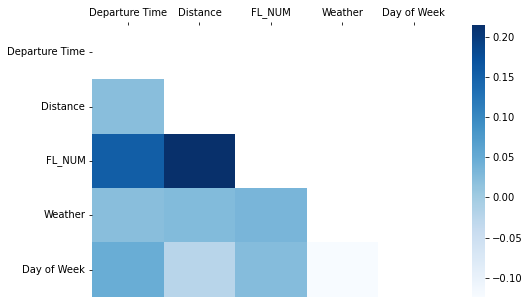

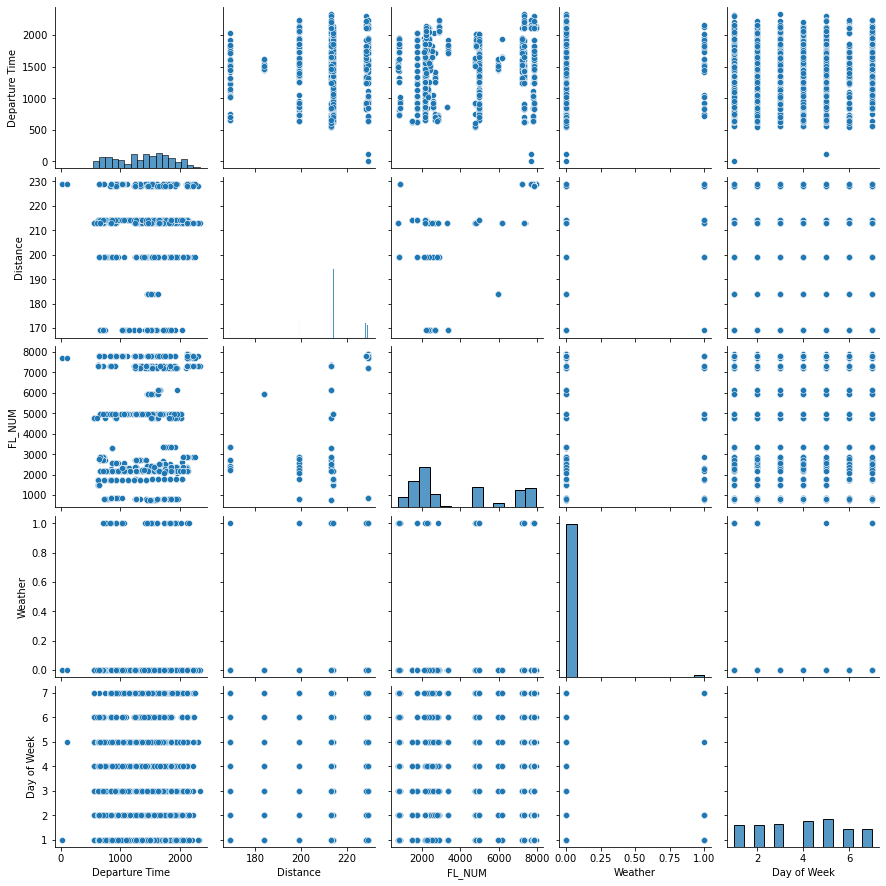

In [10]:
corr = df[['Departure Time', 'Distance', 'FL_NUM', 'Weather', 'Day of Week']].corr(method='spearman')
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.xaxis.tick_top()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=corr, cmap='Blues', mask=mask, ax=ax);
sns.pairplot(df);

Comment:
- Không có sự tương quan rõ rệt nào giữa các cặp thuộc tính

# Câu 3

## Day of Week
Xem tỉ lệ giữa các chuyến bay bị delay so với tổng số các chuyến bay trong dữ liệu theo các ngày trong tuần

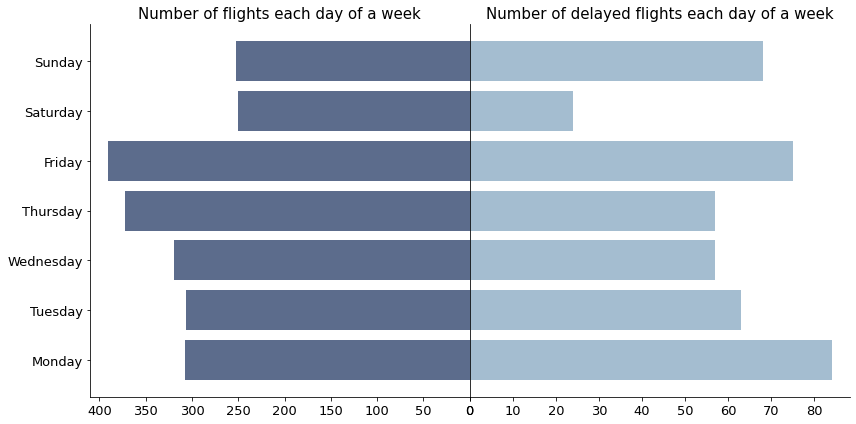

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

t = df['Day of Week'].value_counts().sort_index()
bars = ax1.barh(day, t, color='#5c6c8c')
ax1.invert_xaxis()
ax1.spines['top'].set_visible(False)
ax1.ticklabel_format(axis='x', style='plain')
ax1.tick_params(labelsize=13)
ax1.set_title('Number of flights each day of a week', fontsize=15)

t = df['Day of Week'][df['Flight Status'] == 'delayed'].value_counts().sort_index()
bars = ax2.barh(day, t, color='#a4bdd0')
ax2.spines[['right','top']].set_visible(False)
ax2.ticklabel_format(axis='x', style='plain')
ax2.tick_params(labelsize=13)
ax2.tick_params(axis='y',labelleft=False, left=False)
ax2.set_title('Number of delayed flights each day of a week', fontsize=15)

fig.tight_layout()
fig.subplots_adjust(wspace=0)

Comment:
- Dù tổng số chuyến bay là ngang nhau nhưng các chuyến bị delay vào chủ nhật chiếm cao hơn so với thứ 7
- Thứ 6 có nhiều chuyến bay nhất nhưng số chuyến bị delay vào thứ 6 lại ít hơn so với thứ 2 

## Origin
Xem tỉ lệ giữa các chuyến bay bị delay so với tổng số các chuyến bay trong dữ liệu theo các trạm xuất phát

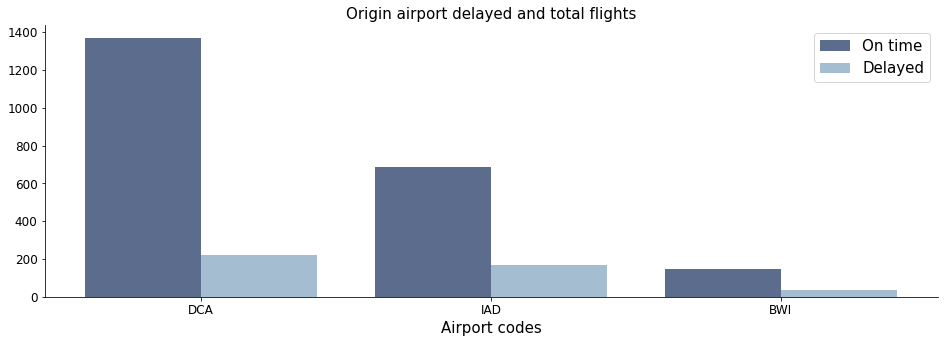

In [12]:
total_origin = df['Origin'].value_counts()
delayed_origin = df['Origin'][df['Flight Status'] == 'delayed'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(16, 5))

X_axis = np.arange(len(total_origin.index))
ax.bar(X_axis - 0.2,total_origin.values, 0.4, color='#5c6c8c')
ax.bar(
    X_axis + 0.2,
    delayed_origin[total_origin.index].values,
    0.4, 
    color='#a4bdd0')
ax.legend(['On time', 'Delayed'], fontsize=15)
ax.set_xticks(X_axis, total_origin.index)
ax.set_title('Origin airport delayed and total flights', fontsize=15)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Airport codes', fontsize=15); 
ax.tick_params('both', labelsize=12)



Comment:
- Tỉ lệ các chuyến bay xuất phát từ sân bay DCA chiếm thấp nhất

## Destination
Xem tỉ lệ giữa các chuyến bay bị delay so với tổng số các chuyến bay trong dữ liệu theo các trạm đích

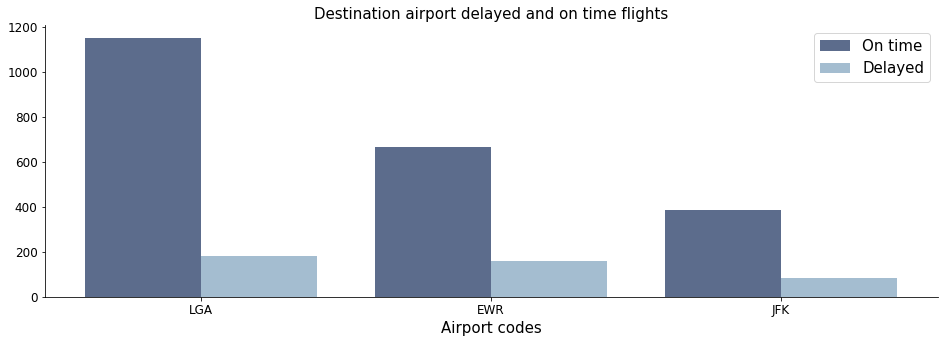

In [13]:
total_dest = df['Destination'].value_counts()
delayed_dest = df['Destination'][df['Flight Status'] == 'delayed'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(16, 5))
X_axis = np.arange(len(total_dest.index))
ax.bar(X_axis - 0.2,total_dest.values, 0.4, color='#5c6c8c')
ax.bar(
    X_axis + 0.2,
    delayed_dest[total_dest.index].values,
    0.4, 
    color='#a4bdd0')
ax.legend(['On time', 'Delayed'], fontsize=15)
ax.set_xticks(X_axis, total_dest.index)
ax.set_title('Destination airport delayed and on time flights', fontsize=15)
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Airport codes', fontsize=15); 
ax.tick_params('both', labelsize=12)

Comment:
- Tỉ lệ các chuyến bay tới sân bay LGA đúng giờ cao nhất so với các sân bay khác

## Route (Origin - Destination)
Xem tỉ lệ giữa các chuyến bay bị delay so với tổng số các chuyến bay trong dữ liệu theo đường bay

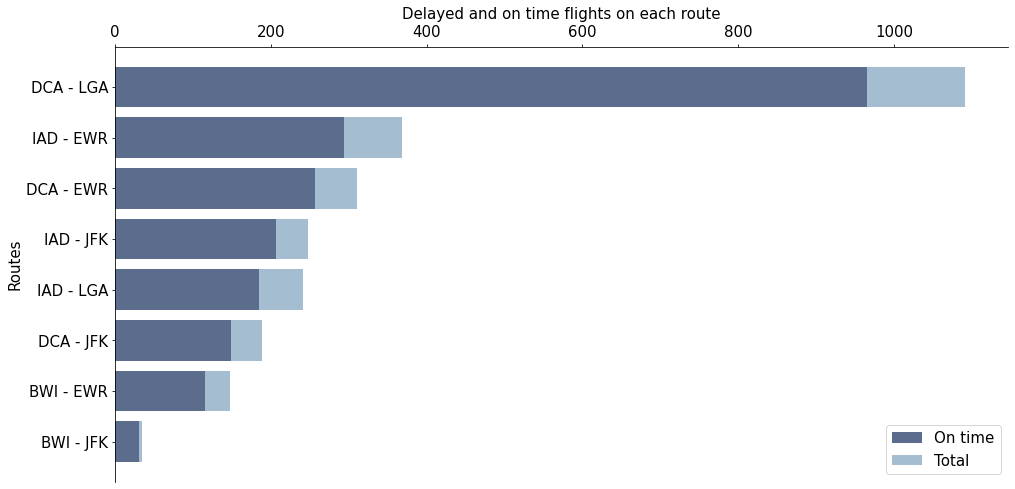

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

total_route = df['route'].value_counts().sort_values(ascending=True)
delayed_route = df['route'][df['Flight Status'] == 'delayed']\
    .value_counts()

ax.barh(total_route.index, total_route.values, color='#5c6c8c')
ax.barh(
    delayed_route[total_route.index].index, 
    delayed_route[total_route.index].values, 
    left=total_route,
    color='#a4bdd0')

ax.xaxis.tick_top()
ax.tick_params('both', labelsize=15)
ax.legend(['On time', 'Total'], fontsize=15)
ax.set_title('Delayed and on time flights on each route', fontsize=15)
ax.spines[['right', 'bottom']].set_visible(False)
ax.set_ylabel('Routes', fontsize=15);

Comment:
- Số các chuyến bay có đường bay từ sân bay DCA đến LGA có tỉ lệ delay thấp nhất
- Tỉ lệ tại các sân bay DCA và LGA đã rất thấp nên điều này cũng dễ hiểu

## Carrier
Xem tỉ lệ giữa các chuyến bay bị delay so với tổng số các chuyến bay trong dữ liệu theo Carrier

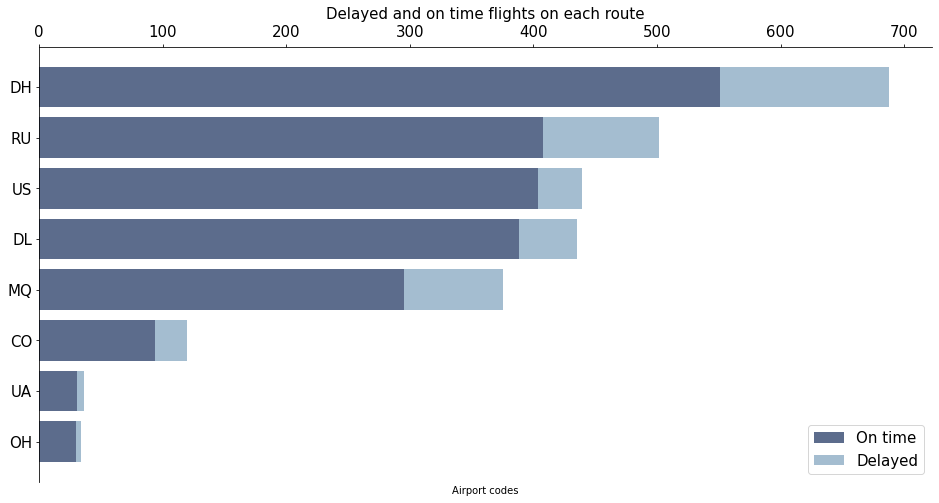

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

total_carrier = df['CARRIER'].value_counts().sort_values(ascending=True)
delayed_carrier = df['CARRIER'][df['Flight Status'] == 'delayed']\
    .value_counts()

ax.barh(total_carrier.index, total_carrier.values, color='#5c6c8c')
ax.barh(
    total_carrier.index, 
    delayed_carrier[total_carrier.index].values, 
    left=total_carrier,
    color='#a4bdd0')

ax.xaxis.tick_top()
ax.tick_params('both', labelsize=15)
ax.legend(['On time', 'Delayed'], fontsize=15)
ax.set_title('Delayed and on time flights on each route', fontsize=15)
ax.spines[['right', 'bottom']].set_visible(False)
ax.set_xlabel('Airport codes');

Comment: 
- Số chuyến bay với các Carrier RU và US tương đương nhau nhưng tỉ lệ delay ở Carrier RU lại cao hơn nhiều so với US

## Weather

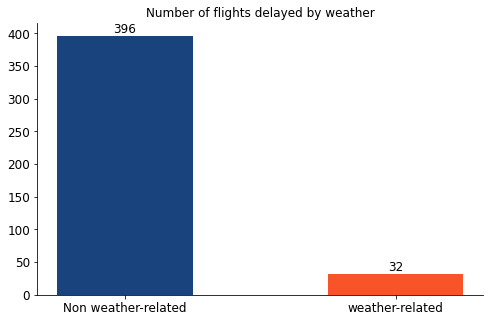

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
delayed = df[df['Flight Status'] == 'delayed']
bars = ax.bar(
    ['Non weather-related', 'weather-related'],
    [sum(delayed['Weather'] == 0), sum(delayed['Weather'] == 1)], 
    width=0.5, color=['#19437D', '#f95329'])
ax.spines[['right', 'top']].set_visible(False)
ax.set_title('Number of flights delayed by weather', fontsize=12)
ax.tick_params('both', labelsize=12)
for bar in bars:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y, s=f'{y}', ha='center', va = 'bottom', fontsize=12)

Comment: 
- Số các chuyến bay bị delay do yếu tố thời tiết chỉ bằng khoảng 1/10 số chuyến bay do các nguyên nhân khác

# Câu 4

In [17]:
# Preprocess
new_df = df.copy()
new_df['Flight Status'] = new_df['Flight Status'].replace(['ontime', 'delayed'],[0, 1])

encoder = LabelEncoder()
new_df['Origin'] = encoder.fit_transform(new_df['Origin'])
new_df['Destination'] = encoder.fit_transform(new_df['Destination'])
new_df['CARRIER'] = encoder.fit_transform(new_df['CARRIER'])

new_df = new_df.drop(['FL_DATE', 'route', 'Weather'], axis=1)

## Kiểm tra tính cân đối của dữ liệu

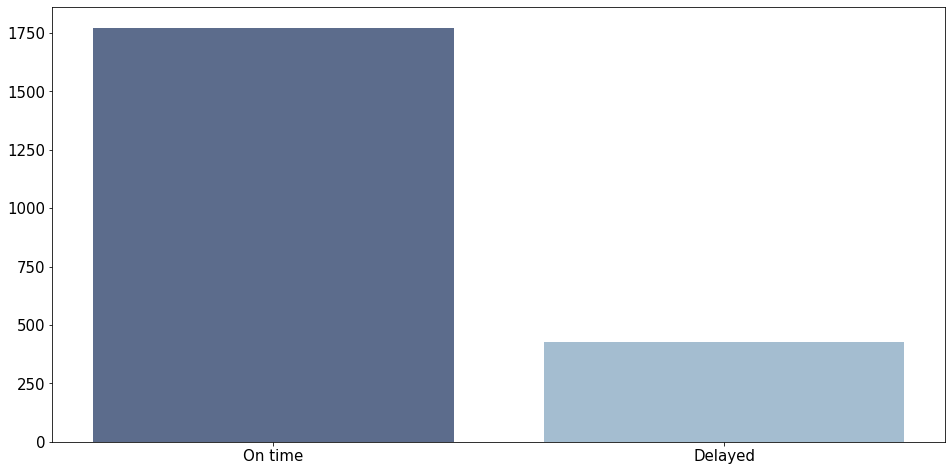

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
t = new_df['Flight Status'].value_counts()
ax.bar(['On time', 'Delayed'], t, color=['#5c6c8c', '#a4bdd0'])
ax.tick_params('both', labelsize=15)

Comment: 
- Dữ liệu quá lệch sang phần on time nên thực hiện oversampling cho delayed

## Oversampling

In [19]:
delayed = new_df[new_df['Flight Status'] == 1]
ontime = new_df[new_df['Flight Status'] == 0]
new_df = pd.concat((delayed.sample(ontime.shape[0], replace=True), ontime))

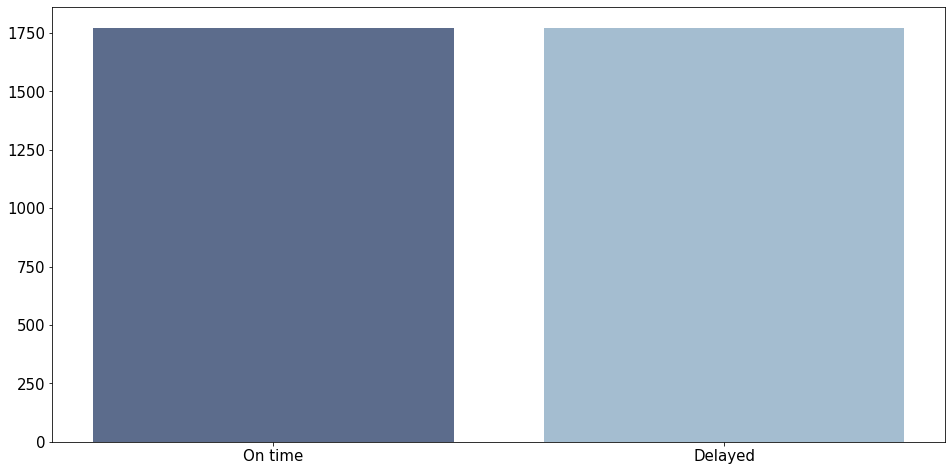

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
t = new_df['Flight Status'].value_counts()
ax.bar(['On time', 'Delayed'], t, color=['#5c6c8c', '#a4bdd0'])
ax.tick_params('both', labelsize=15)

In [21]:
# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(new_df.iloc[:,:-1], new_df.iloc[:, -1], train_size=0.7)

## Mô hình: decision tree

In [22]:
model = DecisionTreeClassifier()
clf = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [23]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       530
           1       0.89      0.95      0.92       534

    accuracy                           0.92      1064
   macro avg       0.92      0.92      0.92      1064
weighted avg       0.92      0.92      0.92      1064



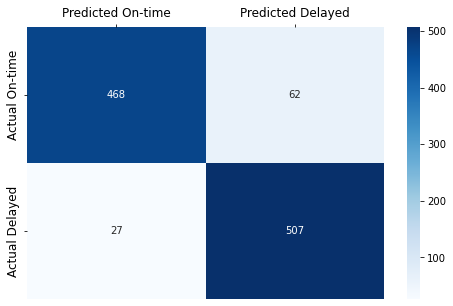

In [24]:
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
 xticklabels=['Predicted On-time', 'Predicted Delayed'],
 yticklabels=['Actual On-time', 'Actual Delayed'],ax=ax);
ax.xaxis.tick_top()
ax.tick_params('both', labelsize=12)